## Credit Card Fraud Detection


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
# loading the data from csv file to a pandas Dataframe
df = pd.read_csv('F:/data science/creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.shape

(284807, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
df.duplicated().sum()

1081

In [13]:
df.drop_duplicates(inplace=True)


In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(283726, 31)

In [16]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

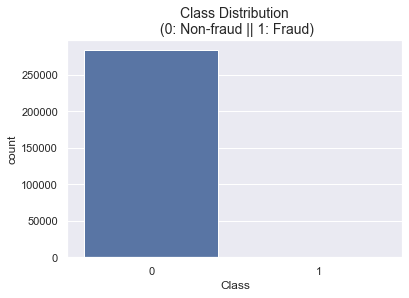

In [17]:
sns.countplot('Class', data=df)
plt.title('Class Distribution\n (0: Non-fraud || 1: Fraud)', fontsize=14)
plt.show()

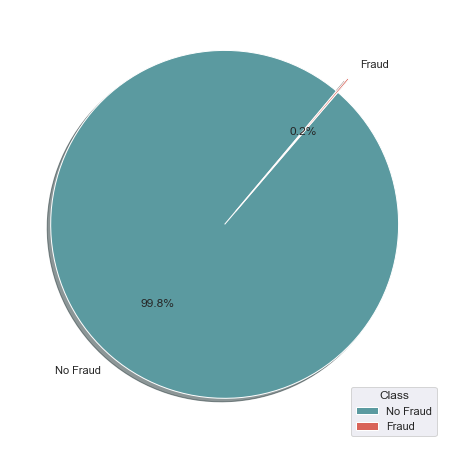

In [18]:
plt.figure(figsize = (10, 8))
plt.pie(df['Class'].value_counts(),labels=['No Fraud','Fraud'], autopct='%1.1f%%', explode = (0.0, 0.1),startangle=50 ,colors = ["#5b9aa0","#d96459"] ,shadow = True)
plt.legend(title = "Class", loc = 'lower right')
plt.show() 

<AxesSubplot:xlabel='Class', ylabel='Time'>

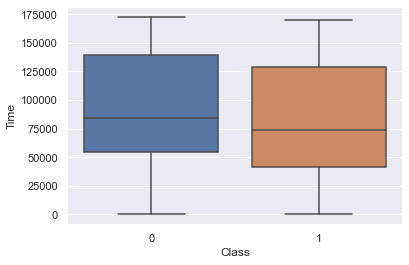

In [19]:
sns.boxplot(y = df.Time, x = df.Class)


In [68]:
#Descriptive statistics for Genuine Transactions
print("Fraudulent Transactions")
df['Amount'][df['Class']==1]. describe()

Fraudulent Transactions


count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [67]:
#Descriptive statistics for Genuine Transactions
print("Genuine Transactions")
df['Amount'][df['Class']==0]. describe()

Genuine Transactions


count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

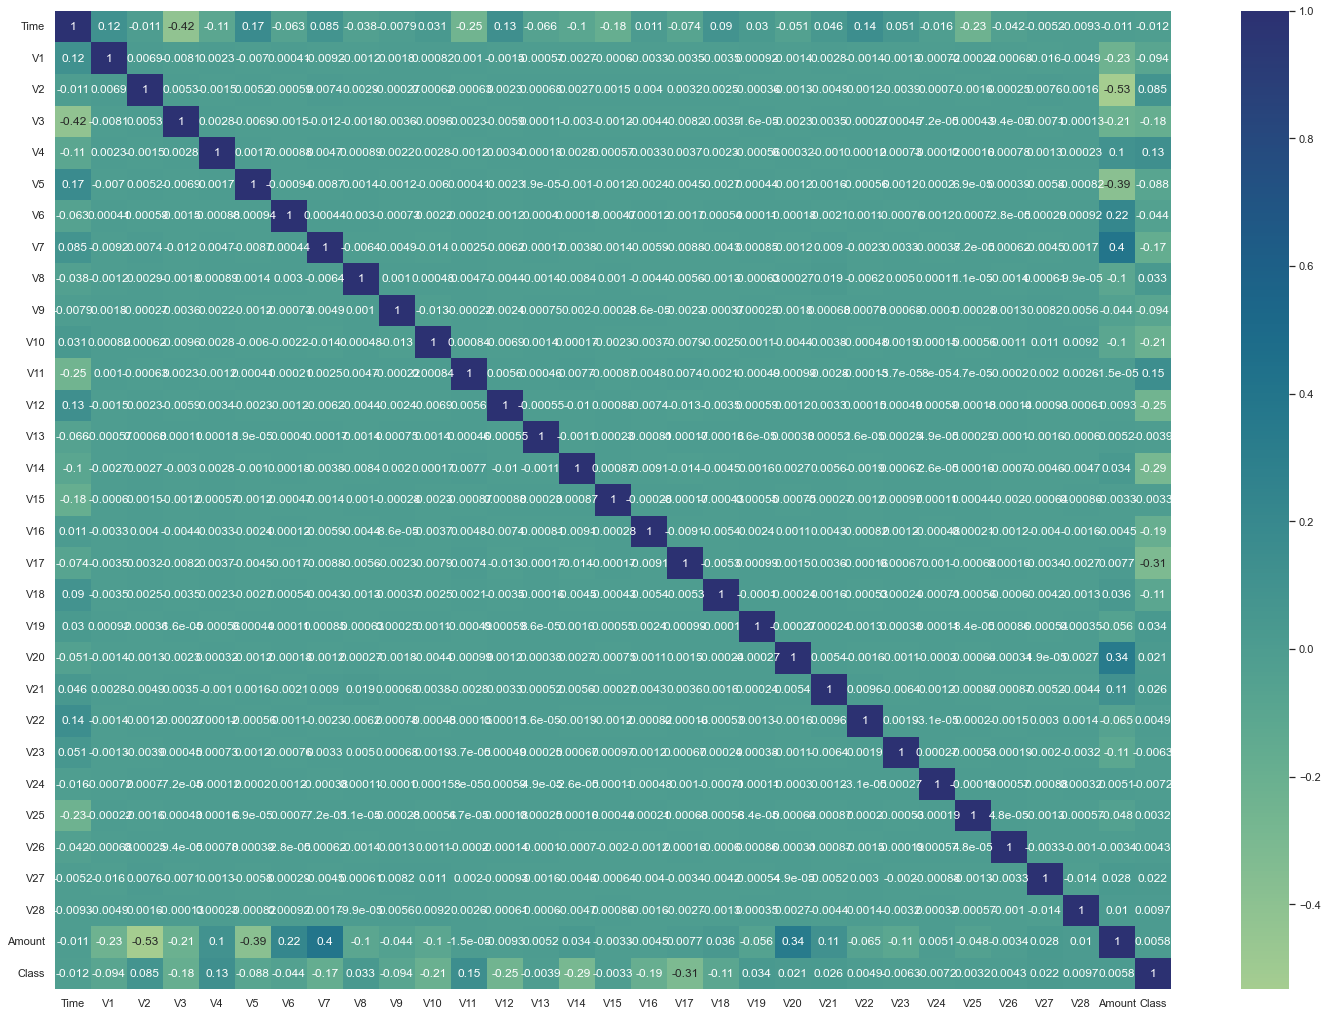

In [71]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(), annot = True, cmap='crest')
plt.show()

<AxesSubplot:xlabel='Amount'>

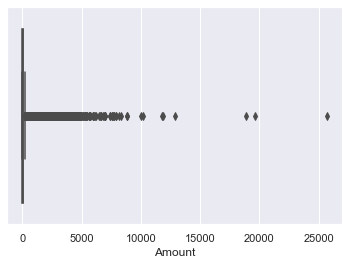

In [22]:
sns.boxplot(data=df, x='Amount')


<AxesSubplot:xlabel='Amount', ylabel='Count'>

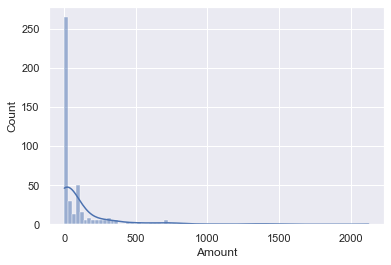

In [23]:
sns.histplot(data = fraud, x = 'Amount', kde = True)

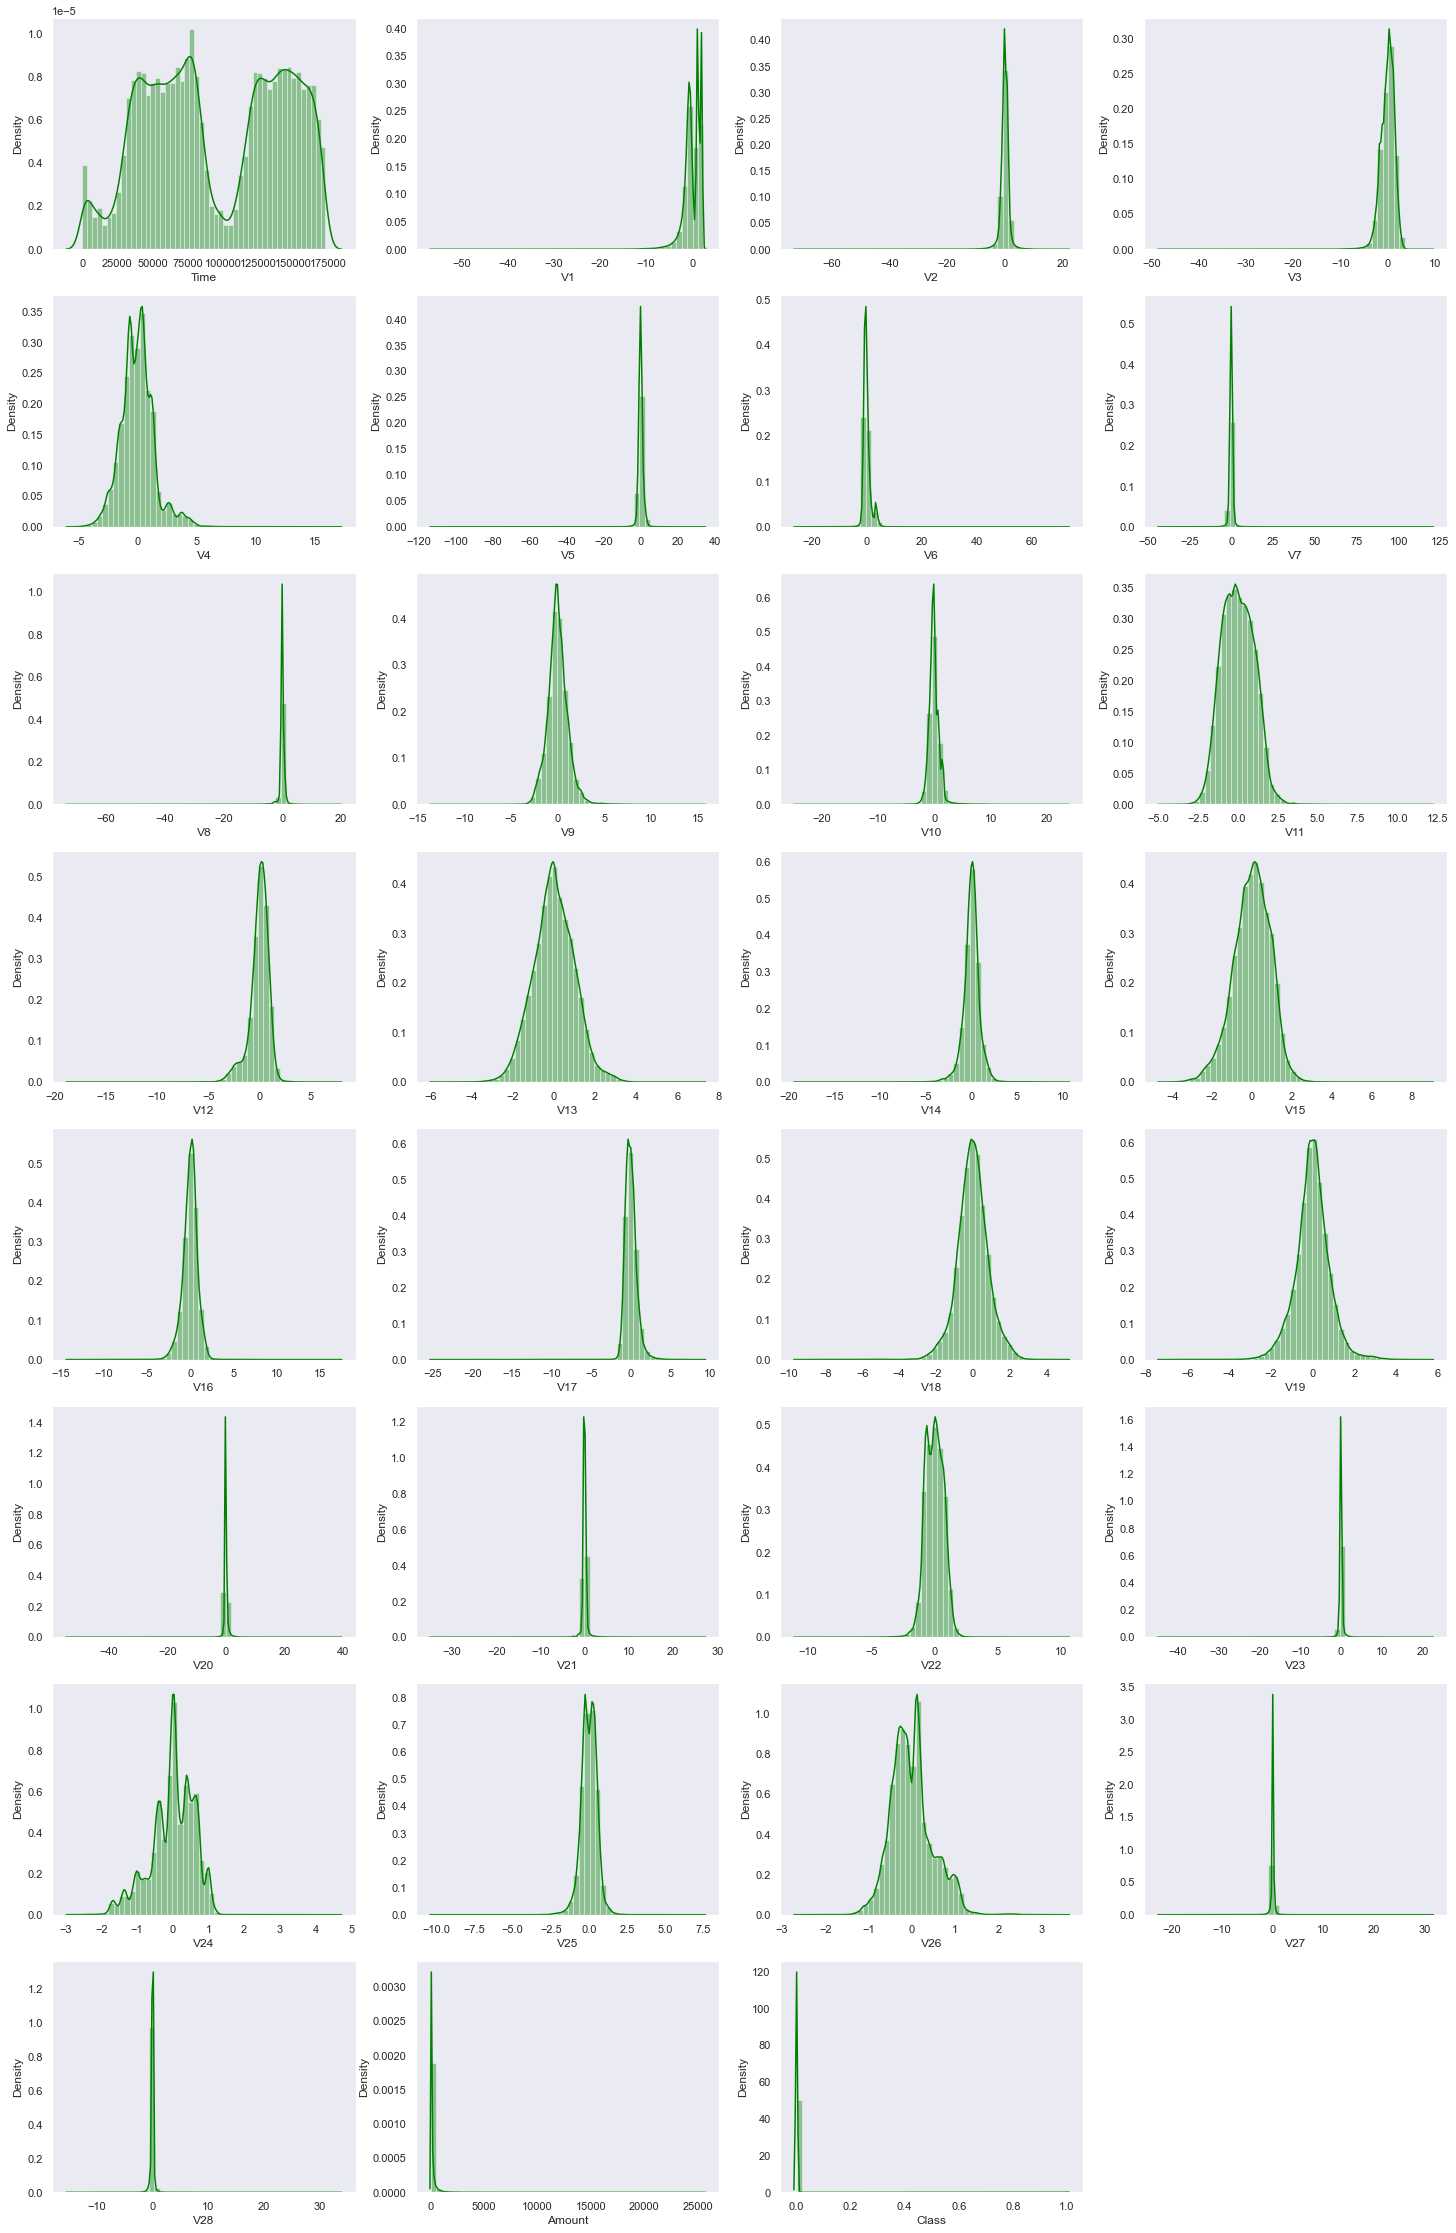

In [25]:
plt.figure(figsize = (25, 40))

for i in range(len(df.columns)):
    plt.subplot(8, 4, i+1)
    sns.distplot(df.iloc[:, i], color = 'green')
    plt.grid()

(0.0, 172792.0)

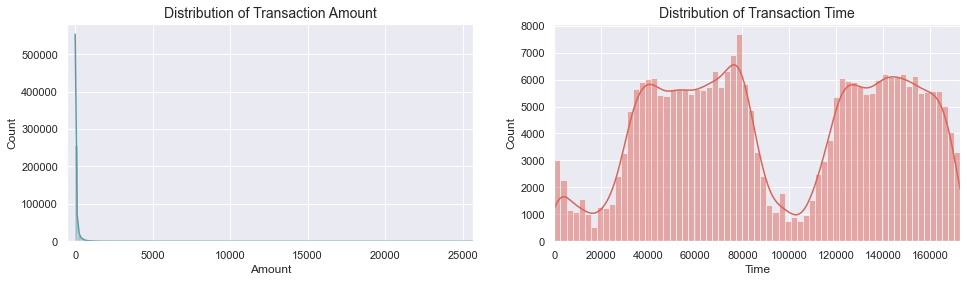

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

amount_val = df.Amount
time_val = df.Time

sns.histplot(df.Amount, ax=ax[0], color='#5b9aa0', kde=True, binwidth = 200)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(df.Amount)-500, max(df.Amount)])

sns.histplot(df.Time, ax=ax[1], color='#d96459', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(df.Time), max(df.Time)])

### ML Model 

In [34]:
# set inputs and outputs
X = df.drop('Class', axis=1)
y = df['Class']

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
# checking the shape of the train and test datasets
print("The shape of x_train is: ",X_train.shape)
print("The shape of x_test is: ",X_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train is:  (190096, 30)
The shape of x_test is:  (93630, 30)
The shape of y_train is:  (190096,)
The shape of y_test is:  (93630,)


In [41]:
#standardize data 
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [48]:
# Train DT model
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [49]:
#Prediction
y_pred = model.predict(X_test_scaled)

### Model Performance Analysis


In [51]:
#Evaluate the model
print(f'Test accuracy: {model.score(X_test_scaled,y_test)*100}')
print(f'Train accuracy: {model.score(X_train_scaled,y_train)*100}')

Test accuracy: 99.9231015700096
Train accuracy: 100.0


In [52]:
DT_cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', DT_cm)

print('\nTrue Positives(TP) = ', DT_cm[0,0])

print('\nTrue Negatives(TN) = ', DT_cm[1,1])

print('\nFalse Positives(FP) = ', DT_cm[0,1])

print('\nFalse Negatives(FN) = ', DT_cm[1,0])

Confusion matrix

 [[93440    43]
 [   29   118]]

True Positives(TP) =  93440

True Negatives(TN) =  118

False Positives(FP) =  43

False Negatives(FN) =  29


<AxesSubplot:>

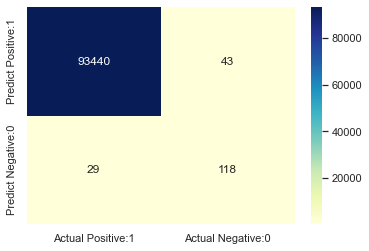

In [62]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=DT_cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [55]:
#Create a classification report for the model.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93483
           1       0.73      0.80      0.77       147

    accuracy                           1.00     93630
   macro avg       0.87      0.90      0.88     93630
weighted avg       1.00      1.00      1.00     93630



In [56]:
print("Accuracy:", str(accuracy_score(y_test,y_pred)*100)+' %')
print("Precision:", str(precision_score(y_test, y_pred)*100)+' %')
print("Recall:", str(recall_score(y_test,y_pred)*100)+' %')
print("F1 Score:", str(f1_score(y_test,y_pred)*100)+' %')


Accuracy: 99.9231015700096 %
Precision: 73.29192546583852 %
Recall: 80.27210884353741 %
F1 Score: 76.62337662337663 %


Text(0.5, 1.0, 'Precision Recall Curve')

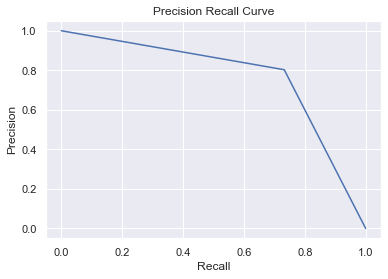

In [59]:
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')